## Kaggle Playground: Titantic

This notebook is limited to the data exploration and feature engineering of the data set. The Machine Learning methods to be employed will be provided in another notebook. 

### Load Required Libraries

In [3]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt

### Exploratory Data Analysis

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The first step is to extract from the dataset the honorifics from the `Name` column. This will be achieved using regex code. 

In [9]:
def extract_honorific(name):
    match = re.search(r',\s*(\w+)\.', name)
    if match:
        return match.group(1)
    return None

In [10]:
train['Honorific'] = train['Name'].apply(extract_honorific)
test['Honorific'] = test['Name'].apply(extract_honorific)

And now for some general exploration of the data frame columns:

In [12]:
train.groupby('Sex', dropna=False).size()

Sex
female    314
male      577
dtype: int64

In [13]:
test.groupby('Sex', dropna=False).size()

Sex
female    152
male      266
dtype: int64

In [14]:
train.groupby('Embarked', dropna=False).size()

Embarked
C      168
Q       77
S      644
NaN      2
dtype: int64

In [15]:
train['Embarked'] = train['Embarked'].fillna('S')

In [16]:
test.groupby('Embarked', dropna=False).size()

Embarked
C    102
Q     46
S    270
dtype: int64

In [17]:
train.groupby('Survived', dropna=False).size()

Survived
0    549
1    342
dtype: int64

In [18]:
train['Cabin'] = train['Cabin'].map(lambda x: 0 if pd.isna(x) else 1)
test['Cabin'] = test['Cabin'].map(lambda x: 0 if pd.isna(x) else 1)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr


In [20]:
train.groupby('Honorific', dropna=False).size()

Honorific
Capt          1
Col           2
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
NaN           1
dtype: int64

In [21]:
test.groupby('Honorific', dropna=False).size()

Honorific
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
dtype: int64

In [22]:
hon_dict = {'rank': ['Capt', 'Col', 'Major', 'Rev', 'Dr', 'Lord', 'Lady', 'Sir'], 
'mr': ['Mr', 'Don'],
'mrs': ['Mrs', 'Dona', 'Mme'],
'miss': ['Miss', 'Mlle', 'Ms'],
'other': ['Master', np.nan, 'Jonkheer']
}

In [23]:
title_mapping = {}
for category, titles in hon_dict.items():
    for title in titles:
        if pd.notna(title):
            title_mapping[title] = category

train['Honorific'] = train['Honorific'].map(title_mapping).fillna('other')

In [24]:
title_mapping = {}
for category, titles in hon_dict.items():
    for title in titles:
        if pd.notna(title):  # Add valid titles to the mapping
            title_mapping[title] = category

test['Honorific'] = test['Honorific'].map(title_mapping).fillna('other')

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,mrs


In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,mr


In [27]:
train.groupby('Pclass', dropna=False).size()

Pclass
1    216
2    184
3    491
dtype: int64

In [28]:
test.groupby('Pclass', dropna=False).size()

Pclass
1    107
2     93
3    218
dtype: int64

In [29]:
train = train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Honorific']]
test = test[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Honorific']]

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Honorific
0,1,0,3,male,22.0,1,0,7.2500,0,S,mr
1,2,1,1,female,38.0,1,0,71.2833,1,C,mrs
2,3,1,3,female,26.0,0,0,7.9250,0,S,miss
3,4,1,1,female,35.0,1,0,53.1000,1,S,mrs
4,5,0,3,male,35.0,0,0,8.0500,0,S,mr


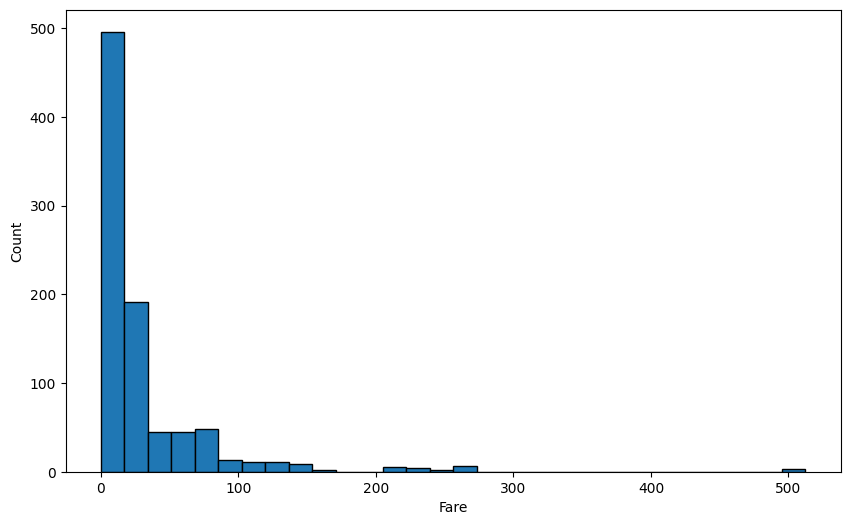

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(train['Fare'], bins=30, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

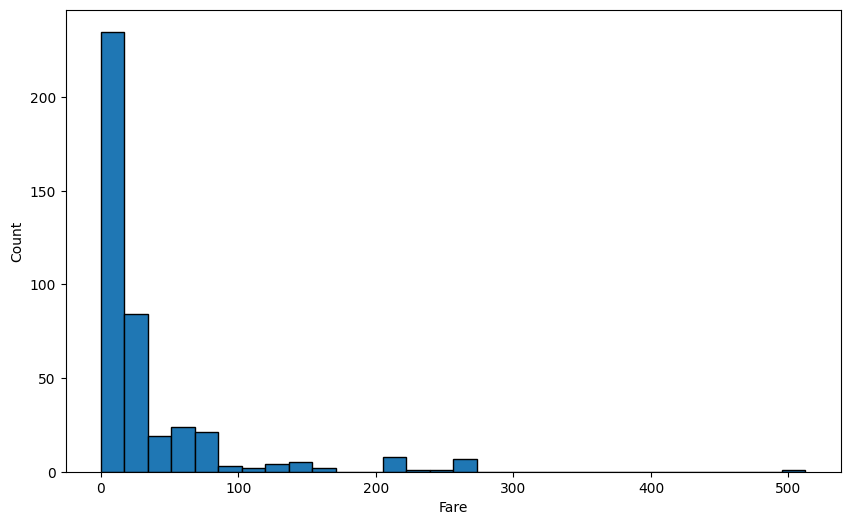

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(test['Fare'], bins=30, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

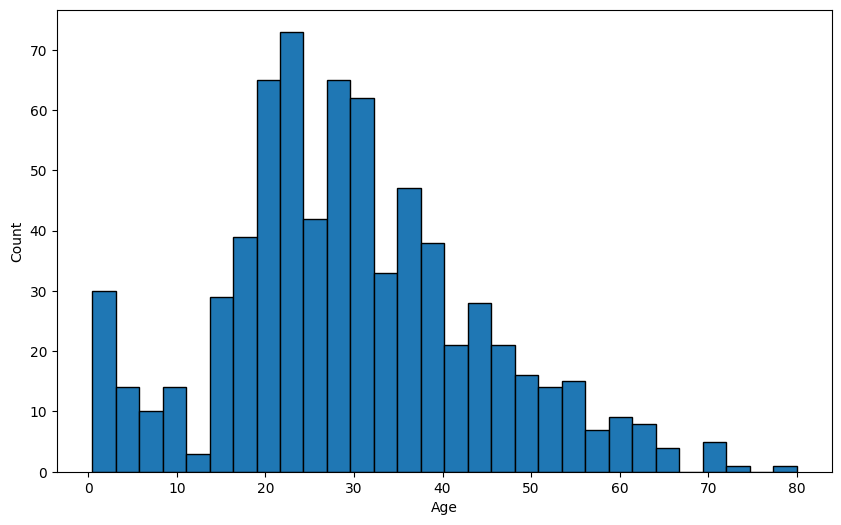

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(train['Age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

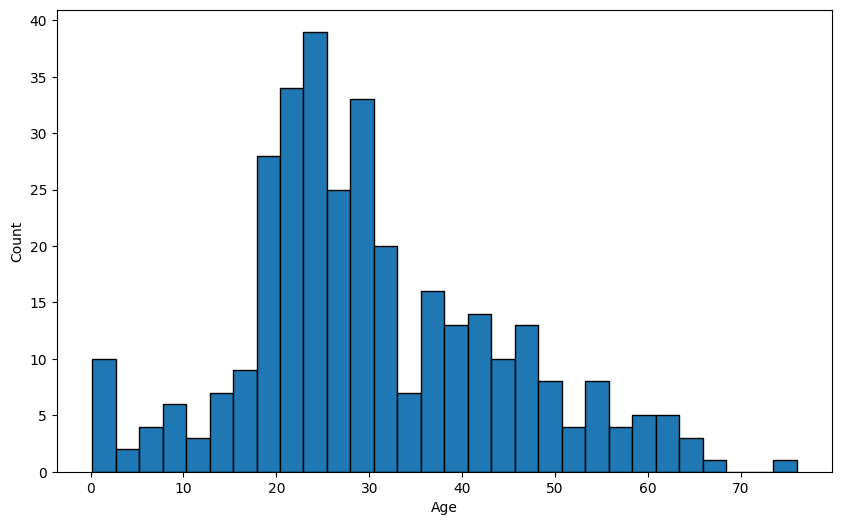

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(test['Age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [35]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [36]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.217703
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.413179
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [37]:
train['Age'] = np.where(train['Age'] < 12, 'child',
                  np.where((train['Age'] >= 12) & (train['Age'] <= 19), 'teen',
                          np.where((train['Age'] > 19) & (train['Age'] <= 25), 'young adult',
                                 np.where((train['Age'] > 25) & (train['Age'] <= 59), 'adult', 
                                        'senior'))))

In [38]:
test['Age'] = np.where(test['Age'] < 12, 'child',
                  np.where((test['Age'] >= 12) & (test['Age'] <= 19), 'teen',
                          np.where((test['Age'] > 19) & (test['Age'] <= 25), 'young adult',
                                 np.where((test['Age'] > 25) & (test['Age'] <= 59), 'adult', 
                                        'senior'))))

In [39]:
train['Fare'] = np.sqrt(train['Fare'])
test['Fare'] = np.sqrt(test['Fare'])

In [40]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

In [41]:
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Honorific
0,1,0,3,1,young adult,1,0,2.692582,0,S,mr
1,2,1,1,0,adult,1,0,8.442944,1,C,mrs
2,3,1,3,0,adult,0,0,2.815138,0,S,miss
3,4,1,1,0,adult,1,0,7.286975,1,S,mrs
4,5,0,3,1,adult,0,0,2.837252,0,S,mr


In [43]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Honorific
0,892,3,1,adult,0,0,2.798071,0,Q,mr
1,893,3,0,adult,1,0,2.645751,0,S,mrs
2,894,2,1,senior,0,0,3.112475,0,Q,mr
3,895,3,1,adult,0,0,2.943213,0,S,mr
4,896,3,0,young adult,1,1,3.505353,0,S,mrs


In [44]:
train.to_csv("training.csv", index=False)
test.to_csv("testing.csv", index=False)